In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#declare hyperparameers
num_epoches=100
tot_len=50000
trun_backprop_length=15
state_size=4# hidden layer neuuron nmuber
num_classes=2
echo_step=3
batch_size=5
num_batches=tot_len//batch_size//trun_backprop_length

In [29]:
dataset=pd.read_csv('insurance.csv')

In [30]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
dataset.shape

(1338, 7)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [34]:
len(dataset.select_dtypes(include=['int64','float64']).columns)

4

In [35]:
dataset.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [36]:
dataset.groupby('sex').mean()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7592\587725788.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby('sex').mean()


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [37]:
dataset.isnull().values.any()

False

In [38]:
dataset.isnull().values.sum()

0

In [39]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [40]:
dataset.head(
    
)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
dataset.shape

(1338, 7)

In [42]:
data2=dataset.drop(columns='charges')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7592\1435140755.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corrwith(dataset['charges']).plot.bar(figsize=(16,9),title='Correlation with Charges',rot=45,grid=True)


<AxesSubplot: title={'center': 'Correlation with Charges'}>

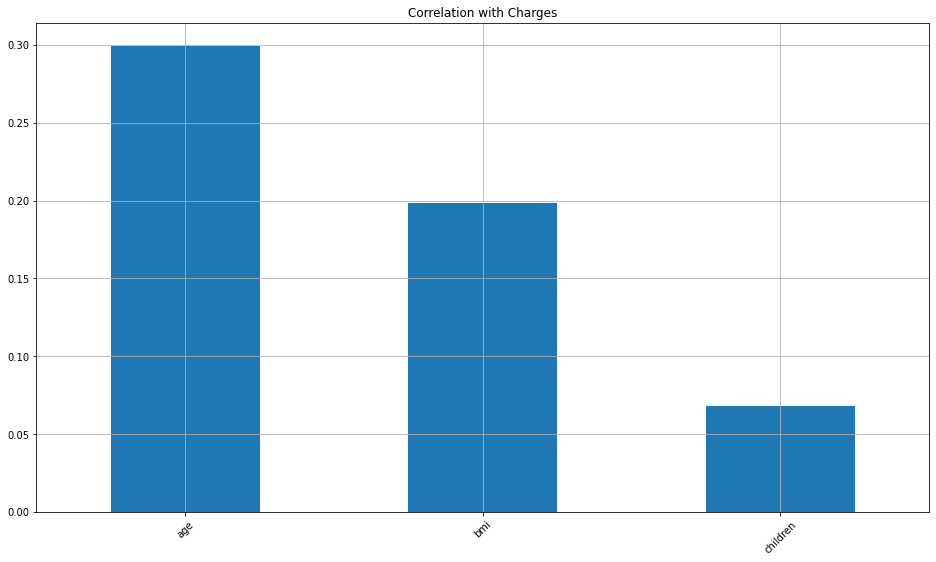

In [43]:
data2.corrwith(dataset['charges']).plot.bar(figsize=(16,9),title='Correlation with Charges',rot=45,grid=True)

In [44]:
corr=dataset.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_7592\3512126831.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=dataset.corr()


<AxesSubplot: >

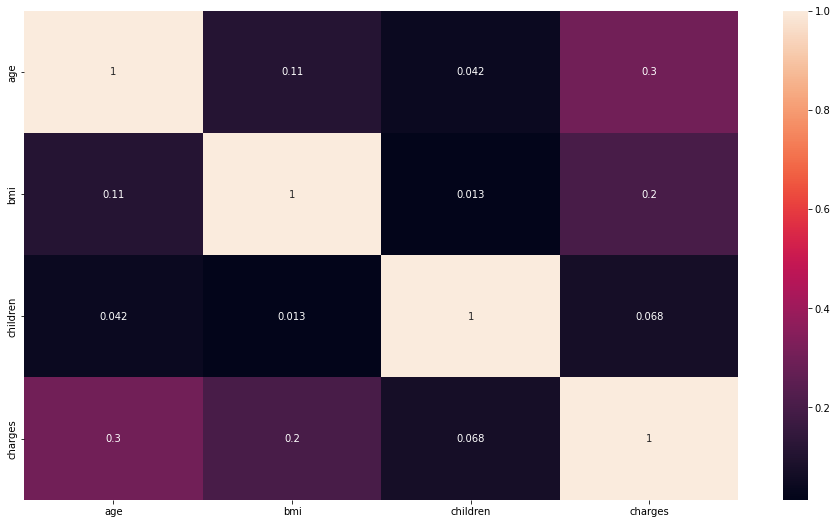

In [45]:
plt.figure(figsize=(16,9))
sns.heatmap(corr,annot=True)

In [46]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [47]:
x=dataset.drop(columns='charges')

In [48]:
y=dataset['charges']

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [52]:
x_test.shape

(402, 6)